In [51]:
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [ ]:
ls

In [ ]:
bigfoot_records = []
with open('data/bigfoot_first100records.json') as f:
    for i in f:
        bigfoot_records.append(json.loads(i))

In [ ]:
bf_info = set()
for record in bigfoot_records:
    [bf_info.add(k) for k in record.keys()]
print(bf_info)


In [ ]:
soup = BeautifulSoup(bigfoot_records[0]['html'], 'html.parser')
print(soup.prettify())

In [ ]:
bigfoot_soup.find('content')

In [ ]:
dir(bigfoot_soup)

In [ ]:
bigfoot_records[0]

In [ ]:
ufo_records

In [ ]:
cd data

In [ ]:
ls

In [ ]:
p_elms = soup.find('table').find_all('p')
for p in p_elms:
    print(p.text)

In [ ]:
records = []
with open("data/bigfoot_first100records.json") as f:
    for record in f:
        records.append(json.loads(record))
for rec in records:
    soup = BeautifulSoup(rec['html'], 'html.parser')
    p_elms = soup.find('table').find_all('p')
    headers = []
    for p in p_elms:
        if p.find('span')!= None:
            p_head_text = p.find('span').text
            if p_head_text not in headers:
                headers.append(p_head_text)
print(headers)

In [ ]:
for p in p_elms:
    print(p.text)

In [5]:
ls

README.md                               images/
case_study_description.md               notebooks/
data/                                   src/
example_reading_and_parsing_data.ipynb


In [400]:
import json
from bs4 import BeautifulSoup 
import re
import pandas as pd

if __name__ == '__main__':

    filename = "data/bigfoot_data.json"
    records = []
    with open(filename) as f:
        for record in f:
            records.append(json.loads(record))

    # get all headers
    for rec in records:
        soup = BeautifulSoup(rec['html'], 'html.parser')
        p_elms = soup.find('table').find_all('p')
        headers = []
        for p in p_elms:
            if p.find('span')!= None:
                p_head_text = p.find('span').text
                if p_head_text not in headers:
                    headers.append(p_head_text)

    # build table
    df = pd.DataFrame(columns=headers)
    for rec in records:
        soup = BeautifulSoup(rec['html'], 'html.parser')
        p_elms = soup.find('table').find_all('p')
        data_dict = {}
        for p in p_elms:
            if p.find('span')!= None:
                p_head_text = p.find('span').text
                data_dict[p_head_text] = re.sub(fr"^{p_head_text}", "", p.text)
        df = df.append([data_dict])

    # clean column names
    df.columns = [col.lower().replace(":","").replace(" ","_") for col in df.columns]
    
    # pickle and save it
#     df.to_pickle('data/{}_pickled_df'.format(filename))

/Users/jbud/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [401]:
df.head()

,a_&_g_references,also_noticed,country,county,date,environment,first_picture_drawn_purely_from_memory.,location_details,month,media_article_#_15,...,nearest_town,observed,other_stories,other_witnesses,province,photo_credit_h._h.,season,state,time_and_conditions,year
0,NaN,"Some tracks in the snow, and a clearing in th...",NaN,Anchorage County,NaN,"In the middle of the woods, in a clearing cov...",NaN,Up near powerline clearings east of Potter Ma...,February,NaN,...,Anchorage / Hillside,I and two of my friends were bored one night ...,I have not heard of any other incidents in An...,My two friends were snowmachining behind me b...,NaN,NaN,Winter,Alaska,Middle of the night. The only light was the h...,2004
0,NaN,"We smelled of colonge and after shave, and on...",NaN,Anchorage County,Friday night,"A pine forest, with a bog or swamp on the rig...",NaN,"Few houses on the way, a power relay station....",December,NaN,...,Anchorage,"Me and a couple of friends had been bored, wh...",no,"4. Me, w-man, warren and sean. We were at my ...",NaN,NaN,Winter,Alaska,"Started at 11, ended at about 3-3:30. Weather...",2003
0,NaN,nothing unusual,NaN,Bethel County,3,Call Iliamna Air taxi for lat & Long of Long ...,NaN,"45 miles by air west of Lake Iliamna, Alaska ...",September,NaN,...,NaN,My hunting buddy and I were sitting on a ridg...,NaN,Scouting for caribou with high quality binocu...,NaN,NaN,Fall,Alaska,NaN,1998
0,NaN,Just these foot prints and how obvious it was...,NaN,Bristol Bay County,20,"Lake front,creek spit, gravel and sand, alder...",NaN,"Approximately 95 miles east of Egegik, Alaska...",July,NaN,...,Egegik,"To whom it may concern, I am a commercial fis...","I've only heard of one other story, from an o...","One other witness, and he was fishing prior t...",NaN,NaN,Summer,Alaska,"Approximately 12:30 pm, partially coudy/sunny.",2004
0,NaN,I did hear what appeared to be grunting in th...,NaN,Cordova-McCarthy County,16,This sighting was located at approximately 1 ...,NaN,"On the main trail toward the glacier, before ...",June,NaN,...,"Kennikot, Alaska",My hiking partner and I arrived late to the K...,None,"I was the only witness, there was one other i...",NaN,NaN,Summer,Alaska,About 12:00 Midnight / full moon / clear / di...,2000


In [214]:
#df['state'].fillna('Unknown', inplace = True)
states = df['state']
state_counts_df = pd.DataFrame(state_counter.values(), state_counter.keys())
state_counts_df.index = state_counts_df.index.str.lstrip()
state_counts_df = state_counts_df[state_counts_df.index.isnull() == False]
state_counts_df.sort_values(0, ascending = False, inplace = True)
state_counts_df.drop('Unknown', inplace = True)

In [220]:
state_counts_df.to_pickle('data/{}_pickled_df'.format('State_Counts'))

In [229]:
state_counts_df.loc['Washington'].values[0]

528

In [230]:
state_counts_df.loc['Washington'].values[0]/state_counts_df.sum().values[0]

0.11629955947136564

In [91]:
from collections import Counter
state_counter = Counter(states)

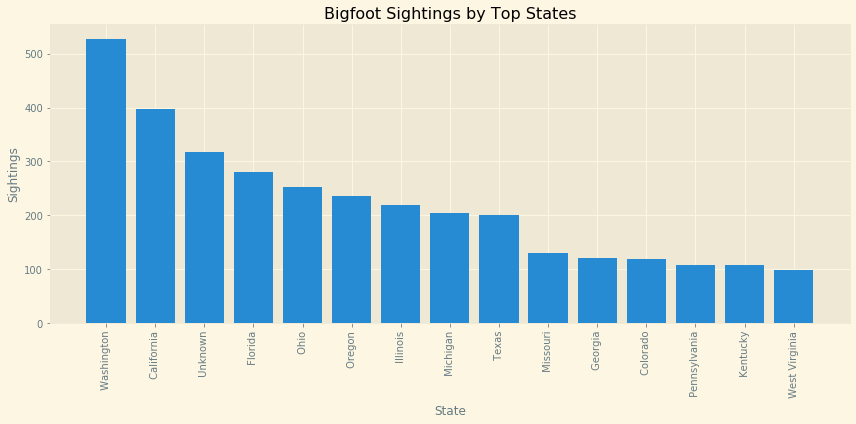

In [92]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize = (12, 6))
states_to_show = 15
ax.bar(state_counts_df.index[:states_to_show], state_counts_df[0][:states_to_show])
ax.set_xticklabels(state_counts_df.index[:states_to_show], rotation= 90)
ax.set_xlabel('State')
ax.set_ylabel('Sightings')
ax.set_title('Bigfoot Sightings by Top States')
fig.tight_layout()

In [68]:
fig.savefig('Top_States_sightings_bar')

In [197]:
month_counts = Counter(df['month'])
month_counts_df = pd.DataFrame(month_counts.values(), month_counts.keys())
month_counts_df.index = month_counts_df.index.str.lstrip()
month_counts_df = month_counts_df[month_counts_df.index.isnull() == False]

months =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_counts_df.index = pd.Categorical(month_counts_df.index, categories=months, ordered=True)
month_counts_df.sort_index(inplace = True)

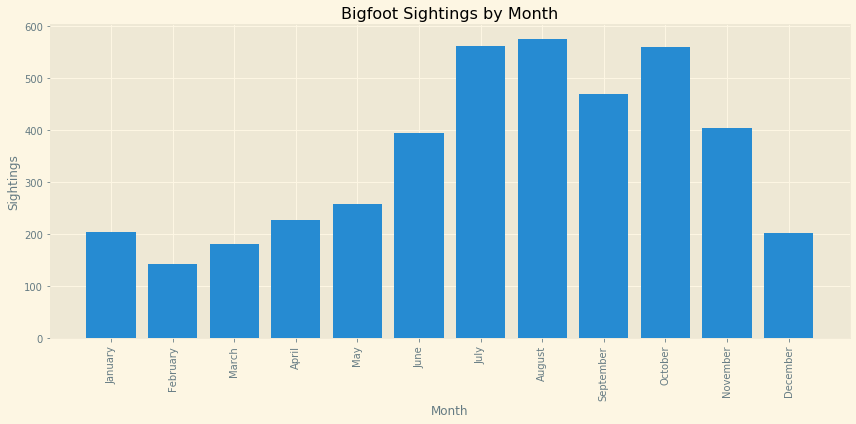

In [392]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(month_counts_df.index, month_counts_df[0])
ax.set_xticklabels(month_counts_df.index, rotation= 90)
ax.set_xlabel('Month')
ax.set_ylabel('Sightings')
ax.set_title('Bigfoot Sightings by Month')
fig.tight_layout()

In [393]:
fig.savefig('images/Top_Months_sightings_bar')

In [195]:
ls

README.md                               images/
case_study_description.md               notebooks/
data/                                   src/
example_reading_and_parsing_data.ipynb


In [154]:
month_counts_df.index

Float64Index([205.0, 142.0, 181.0, 227.0, 258.0, 394.0, 563.0, 575.0, 469.0,
              560.0, 405.0, 202.0,   nan],
             dtype='float64')

In [ ]:
states.fillna('Unknown', inplace = True)

In [ ]:
states = states.str.lstrip()

In [7]:
states

NameError: name 'states' is not defined

In [ ]:
state_count = Counter(states)

In [ ]:
state_count.keys()

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

state_count = Counter(df['state'])

state_count.keys()

plt.bar(state_count.keys(), state_count.values())

In [ ]:
df

In [ ]:
ls data

In [291]:
#look at month and year
time_df = df[['month', 'year', 'date']].copy()

In [292]:
time_df.dropna(inplace = True)

In [293]:
time_df.reset_index(inplace = True)

In [294]:
time_df.drop('index', axis = 1, inplace = True)

In [341]:
[time_df['month']]

[0         December
 1        September
 2             July
 3             June
 4              May
            ...    
 3059     September
 3060     September
 3061           May
 3062          July
 3063        August
 Name: month, Length: 3064, dtype: object]

In [342]:
years = []

for i, each in zip(time_df.index, time_df['year']):
    if len(each) == 5:
        try:
            years.append(int(each))
        except:
            continue
            

In [375]:
year_counts_df.index = year_counts_df.index.astype(int)

In [376]:
year_counts.keys()

dict_keys([2003, 1998, 2004, 2000, 1997, 1964, 2001, 2008, 1979, 1980, 2014, 2015, 1996, 2013, 2005, 1978, 1992, 2012, 1988, 2007, 2002, 2006, 1993, 2009, 1983, 1986, 1999, 2010, 1981, 1994, 1984, 1985, 2011, 1970, 2016, 2017, 1989, 1977, 1991, 1973, 1990, 1975, 1967, 1995, 1969, 1961, 1972, 1976, 1974, 1987, 1963, 1982, 1966, 1959, 1971, 1968, 1962, 1953, 1937, 1965, 1950, 1958, 1921, 1960, 1949, 1811, 1934, 1941])

In [377]:
year_counts_df = pd.DataFrame(year_counts.values(), year_counts.keys())

In [378]:
year_counts_df.sort_index(inplace = True)

In [381]:
year_counts_df

,0
1811,1
1921,1
1934,3
1937,1
1941,1
...,...
2013,118
2014,103
2015,61
2016,30


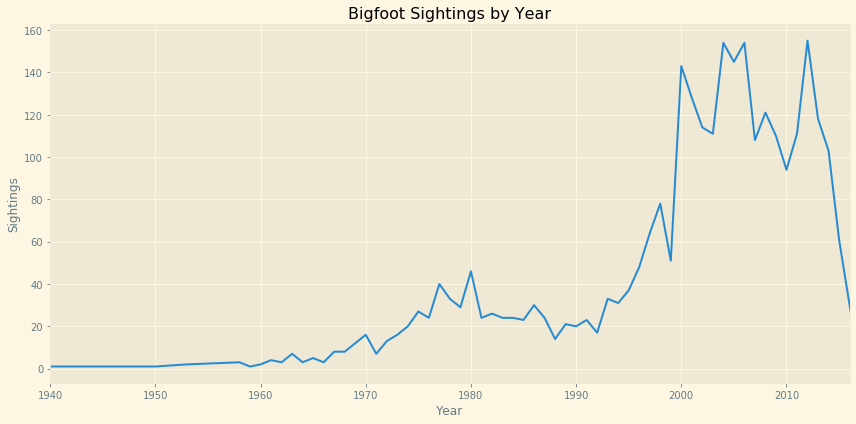

In [389]:
year_counts = Counter(years)

fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(year_counts_df.index, year_counts_df[0])
#ax.set_xticklabels(year_counts_df.index, rotation= 90)
ax.set_xlabel('Year')
ax.set_ylabel('Sightings')
ax.set_title('Bigfoot Sightings by Year')
ax.set_xlim(1940, 2016)
fig.tight_layout()

In [391]:
fig.savefig('images/Top_Years_sightings_line')

In [316]:
set(time_df.iloc[indices]['month'])
month = {	'01':'January',
		'02':'February',
		'03':'March',
		'04':'April',
		'05':'May',
		'06':'June',
		'07':'July',
		'08':'August',
		'09':'September',
		'10':'October',
		'11':'November',
		'12':'December'		}

In [336]:
for i, each in month.items():
    month_dict[each] = i

In [337]:
month_dict

{'January': '01',
 'February': '02',
 'March': '03',
 'April': '04',
 'May': '05',
 'June': '06',
 'July': '07',
 'August': '08',
 'September': '09',
 'October': '10',
 'November': '11',
 'December': '12'}

In [259]:
set(time_df['year'])

{'  1976',
 '  1983',
 '  1989',
 '  1998',
 '  2014',
 " '01or '02",
 " '73-'74?",
 " '91 or'92",
 " '92-'93",
 " '96  ",
 ' 04-05',
 ' 04-present',
 ' 05',
 ' 07',
 ' 07-26-08',
 ' 08',
 ' 08-09',
 ' 09-12',
 ' 1/5/1998',
 ' 1811',
 ' 1870',
 ' 1890',
 ' 1905',
 ' 1910',
 ' 1920',
 ' 1921',
 ' 1924',
 ' 1925',
 ' 1926',
 ' 1930',
 " 1930's",
 ' 1932',
 ' 1934',
 ' 1937',
 ' 1938',
 ' 1940',
 ' 1941',
 ' 1942',
 ' 1943',
 ' 1944',
 ' 1945',
 ' 1947/48',
 ' 1948',
 ' 1949',
 ' 1950',
 " 1950's",
 ' 1951/2',
 ' 1952 or 1953',
 ' 1952-53',
 ' 1953',
 ' 1953-1976',
 ' 1954',
 ' 1954-55',
 ' 1955',
 ' 1956',
 ' 1956 or 1957',
 ' 1957',
 ' 1957 or 58',
 ' 1958',
 ' 1959',
 ' 1959 or 60',
 ' 1960',
 " 1960's",
 ' 1960/2010',
 ' 1961',
 ' 1961 1962',
 ' 1962',
 ' 1962?',
 ' 1963',
 ' 1963-2002',
 ' 1964',
 ' 1964 ',
 ' 1965',
 ' 1965-66',
 ' 1966',
 ' 1967',
 ' 1967-1970 ',
 ' 1967/1993',
 ' 1968',
 ' 1968 ',
 ' 1968 or 69',
 ' 1969',
 ' 1969-1979',
 ' 1969-1980',
 ' 1970',
 ' 1970 ',
 ' 1970

In [258]:
time_df['year'].astype(int)

ValueError: invalid literal for int() with base 10: " Late 1970's"

In [405]:
df[df['country'] == ' Canada']

,a_&_g_references,also_noticed,country,county,date,environment,first_picture_drawn_purely_from_memory.,location_details,month,media_article_#_15,...,nearest_town,observed,other_stories,other_witnesses,province,photo_credit_h._h.,season,state,time_and_conditions,year
0,NaN,Just something moving in the bush then rocks ...,Canada,NaN,6,Foot hills spruce forest mixed with popular t...,NaN,"Black Stone Gap area, North West of Nordegg, ...",September,NaN,...,Nordegg,We were out bow hunting in the Black Stone Ga...,No,2 building a fire to cook dinner,Alberta,NaN,Summer,NaN,9:30 pm it was dark and there where clouds an...,2016
0,NaN,Appeared to know I was present and took evasi...,Canada,NaN,17,Mountainous,NaN,ON THE ROAD A FEW HUNDRED METRES FROM THE CAM...,June,NaN,...,"Waterton, Alberta","SASQUATCH SIGHTING  WATERTON NATIONAL PARK, ...",Keys - reported on the BFRO site,No,Alberta,NaN,Spring,NaN,First light - clear skies,2011
0,NaN,"My dog chases wildlife, she is a sight hound,...",Canada,NaN,14,"River bank, very well treed on both sides, in...",NaN,It was just south of the bow valley campgroun...,May,NaN,...,Bow Valley Campground,"I was camping with my daughter and dog, we ha...",No,I was there with my daughter (8) who did not ...,Alberta,NaN,Spring,NaN,It was around 9pm just after the sun went beh...,2011
0,NaN,I did see the next morning impressions in the...,Canada,NaN,july 22/10,"Very dense vegetation, fur trees, trembling a...",NaN,Specific directions omitted for further research,July,NaN,...,Bragg Creek,"I am an avid hiker,fisher, and camper. I do g...","no, But the consevation officers I have talke...",No witnesses,Alberta,NaN,Summer,NaN,late night to daybreak,2010
0,NaN,No.,Canada,NaN,08/09/2009,Forested area with heavy brush and trees. Man...,NaN,The camp site is right on the Forestry Trunk ...,August,NaN,...,Sundre,"On August 9, 2009 I returned to my camp site ...",No.,It was only me. There seemed to be no one els...,Alberta,NaN,Summer,NaN,Morning around 6am. It was around 10-12°C. Cl...,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,"Just the tree formations in the clearcut, the...",Canada,NaN,14,"Lots of pine and bush mix, maybe some hardwoo...",NaN,Its pretty hard to explain because I dont kno...,July,NaN,...,Maple Creek,Well I had camped in Cypress Hills Interprovi...,Haven't heard anything except for what's on y...,"Only my girlfriend and I, we were scanning th...",Saskatchewan,NaN,Summer,NaN,It was about 9:20 p.m. or close to there just...,2001
0,NaN,If it was a Bigfoot I am thinking it could ha...,Canada,NaN,NaN,"Graveyard,Pine forest, Fields, Near river and...",NaN,It was near Barrier lake. There is a forested...,July,NaN,...,Sylvania/Tisdale,I came across your website from following a l...,None.,"5 people, two witnesses.",Saskatchewan,NaN,Summer,NaN,"Dark,Night,rain,thunder,lightning.",1995
0,NaN,Like I said it was extremely quiet. I don't r...,Canada,NaN,NaN,Pine and Spruce Aspen Willow and swamp.,NaN,AT the end of Thompson Blvd. in a suburban ne...,August,NaN,...,Whitehorse,This incident happened in the summer of 1992 ...,Like I said the natives see or hear him in th...,Mother was present but did't see it and I did...,Yukon,NaN,Summer,NaN,"2 P.M. Like I said sunny, 20 degrees.",1992
0,NaN,no,Canada,NaN,"June 14, 1995",NaN,NaN,It was in a new part of Carmacks that was bei...,NaN,NaN,...,"Carmacks, YT","I was about 14 years old, when me and my frie...","yes, there have been many bigfoot sightings i...",Yes my friend Amanda,Yukon,NaN,Summer,NaN,daytime,1995


In [404]:
df

,a_&_g_references,also_noticed,country,county,date,environment,first_picture_drawn_purely_from_memory.,location_details,month,media_article_#_15,...,nearest_town,observed,other_stories,other_witnesses,province,photo_credit_h._h.,season,state,time_and_conditions,year
0,NaN,"Some tracks in the snow, and a clearing in th...",NaN,Anchorage County,NaN,"In the middle of the woods, in a clearing cov...",NaN,Up near powerline clearings east of Potter Ma...,February,NaN,...,Anchorage / Hillside,I and two of my friends were bored one night ...,I have not heard of any other incidents in An...,My two friends were snowmachining behind me b...,NaN,NaN,Winter,Alaska,Middle of the night. The only light was the h...,2004
0,NaN,"We smelled of colonge and after shave, and on...",NaN,Anchorage County,Friday night,"A pine forest, with a bog or swamp on the rig...",NaN,"Few houses on the way, a power relay station....",December,NaN,...,Anchorage,"Me and a couple of friends had been bored, wh...",no,"4. Me, w-man, warren and sean. We were at my ...",NaN,NaN,Winter,Alaska,"Started at 11, ended at about 3-3:30. Weather...",2003
0,NaN,nothing unusual,NaN,Bethel County,3,Call Iliamna Air taxi for lat & Long of Long ...,NaN,"45 miles by air west of Lake Iliamna, Alaska ...",September,NaN,...,NaN,My hunting buddy and I were sitting on a ridg...,NaN,Scouting for caribou with high quality binocu...,NaN,NaN,Fall,Alaska,NaN,1998
0,NaN,Just these foot prints and how obvious it was...,NaN,Bristol Bay County,20,"Lake front,creek spit, gravel and sand, alder...",NaN,"Approximately 95 miles east of Egegik, Alaska...",July,NaN,...,Egegik,"To whom it may concern, I am a commercial fis...","I've only heard of one other story, from an o...","One other witness, and he was fishing prior t...",NaN,NaN,Summer,Alaska,"Approximately 12:30 pm, partially coudy/sunny.",2004
0,NaN,I did hear what appeared to be grunting in th...,NaN,Cordova-McCarthy County,16,This sighting was located at approximately 1 ...,NaN,"On the main trail toward the glacier, before ...",June,NaN,...,"Kennikot, Alaska",My hiking partner and I arrived late to the K...,None,"I was the only witness, there was one other i...",NaN,NaN,Summer,Alaska,About 12:00 Midnight / full moon / clear / di...,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,"Just the tree formations in the clearcut, the...",Canada,NaN,14,"Lots of pine and bush mix, maybe some hardwoo...",NaN,Its pretty hard to explain because I dont kno...,July,NaN,...,Maple Creek,Well I had camped in Cypress Hills Interprovi...,Haven't heard anything except for what's on y...,"Only my girlfriend and I, we were scanning th...",Saskatchewan,NaN,Summer,NaN,It was about 9:20 p.m. or close to there just...,2001
0,NaN,If it was a Bigfoot I am thinking it could ha...,Canada,NaN,NaN,"Graveyard,Pine forest, Fields, Near river and...",NaN,It was near Barrier lake. There is a forested...,July,NaN,...,Sylvania/Tisdale,I came across your website from following a l...,None.,"5 people, two witnesses.",Saskatchewan,NaN,Summer,NaN,"Dark,Night,rain,thunder,lightning.",1995
0,NaN,Like I said it was extremely quiet. I don't r...,Canada,NaN,NaN,Pine and Spruce Aspen Willow and swamp.,NaN,AT the end of Thompson Blvd. in a suburban ne...,August,NaN,...,Whitehorse,This incident happened in the summer of 1992 ...,Like I said the natives see or hear him in th...,Mother was present but did't see it and I did...,Yukon,NaN,Summer,NaN,"2 P.M. Like I said sunny, 20 degrees.",1992
0,NaN,no,Canada,NaN,"June 14, 1995",NaN,NaN,It was in a new part of Carmacks that was bei...,NaN,NaN,...,"Carmacks, YT","I was about 14 years old, when me and my frie...","yes, there have been many bigfoot sightings i...",Yes my friend Amanda,Yukon,NaN,Summer,NaN,daytime,1995


In [421]:
canada_df = df[df['country'] == ' Canada'][['country', 'province']].copy()

In [425]:
canada_counts_df = canada_df.groupby('province').count()

In [444]:
canada_counts_df.rename(columns = {'country' : 'count'}, inplace = True)

In [450]:
canada_counts_df.sort_values('count', ascending = False, inplace = True)

In [451]:
canada_counts_df.index = canada_counts_df.index.str.lstrip()
canada_counts_df.index

Index(['British Columbia', 'Ontario', 'Alberta', 'Manitoba', 'New Brunswick',
       'Saskatchewan', 'Quebec', 'Yukon', 'Nova Scotia'],
      dtype='object', name='province')

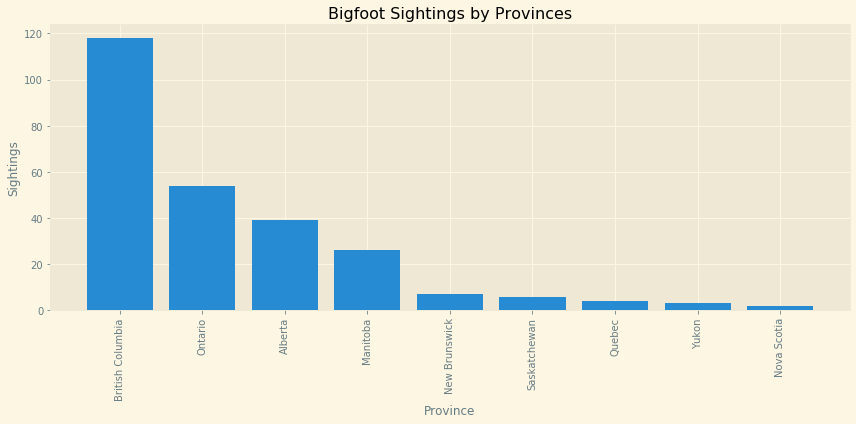

In [452]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(canada_counts_df.index, canada_counts_df['count'])
ax.set_xticklabels(canada_counts_df.index, rotation= 90)
ax.set_xlabel('Province')
ax.set_ylabel('Sightings')
ax.set_title('Bigfoot Sightings by Provinces')
fig.tight_layout()

In [454]:
fig.savefig('images/Top_Canada_Sightings')

In [431]:
canada_counts_df.to_pickle('data/{}_pickled_df'.format('Canada_counts_df'))

In [413]:
df[df['country'] == 'Canada']

,a_&_g_references,also_noticed,country,county,date,environment,first_picture_drawn_purely_from_memory.,location_details,month,media_article_#_15,...,nearest_town,observed,other_stories,other_witnesses,province,photo_credit_h._h.,season,state,time_and_conditions,year


In [411]:
df.columns

Index(['a_&_g_references', 'also_noticed', 'country', 'county', 'date',
       'environment', 'first_picture_drawn_purely_from_memory.',
       'location_details', 'month', 'media_article_#_15',
       'media_article_#_150', 'media_article_#_180', 'media_article_#_196',
       'media_article_#_202', 'media_article_#_203', 'media_article_#_23',
       'media_article_#_24', 'media_article_#_249', 'media_article_#_25',
       'media_article_#_250', 'media_article_#_26', 'media_article_#_28',
       'media_article_#_289', 'media_article_#_29', 'media_article_#_30',
       'media_article_#_31', 'media_article_#_32', 'media_article_#_320',
       'media_article_#_321', 'media_article_#_361', 'media_article_#_363',
       'media_article_#_377', 'media_article_#_381', 'media_article_#_406',
       'media_article_#_424', 'media_article_#_425', 'media_article_#_430',
       'media_article_#_474', 'media_article_#_55', 'media_article_#_551',
       'media_article_#_552', 'media_article_#_557', 'm

In [464]:
list([line.split() for line in df['time_and_conditions'].values])

AttributeError: 'float' object has no attribute 'split'

In [475]:
time_conds = []
for each in df['time_and_conditions'].values:
    if type(each) == str:
        time_conds.extend(each.split())

In [478]:
test = Counter(time_conds)

In [481]:
test.most_common()

[('was', 2852),
 ('the', 2218),
 ('and', 1750),
 ('a', 1057),
 ('It', 935),
 ('in', 892),
 ('clear', 765),
 ('it', 737),
 ('to', 678),
 ('of', 654),
 ('about', 626),
 ('The', 522),
 ('at', 515),
 ('around', 514),
 ('I', 506),
 ('but', 444),
 ('very', 443),
 ('on', 402),
 ('night', 392),
 ('with', 383),
 ('dark', 369),
 ('light', 356),
 ('no', 342),
 ('weather', 327),
 ('or', 321),
 ('were', 295),
 ('day', 284),
 ('sunny', 277),
 ('that', 237),
 ('early', 230),
 ('morning', 228),
 ('had', 224),
 ('night.', 223),
 ('moon', 221),
 ('pm', 210),
 ('from', 209),
 ('not', 201),
 ('just', 198),
 ('time', 192),
 ('warm', 189),
 ('day.', 188),
 ('late', 185),
 ('after', 179),
 ('Clear', 178),
 ('my', 176),
 ('About', 170),
 ('before', 168),
 ('sun', 167),
 ('between', 159),
 ('bright', 155),
 ('we', 152),
 ('am', 151),
 ('cool', 151),
 ('p.m.', 150),
 ('cold', 148),
 ('for', 146),
 ('Around', 145),
 ('-', 144),
 ('night,', 143),
 ('Early', 139),
 ('afternoon', 136),
 ('there', 134),
 ('full', 13

In [505]:
import pandas as pd
import numpy as np
from string import punctuation
import json
from bs4 import BeautifulSoup
import nltk
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from tabulate import tabulate
import matplotlib.pyplot as plt 

def get_stop_words(new_stop_words=None):
    # Retrieve stop words and append any additional stop words
    stop_words = list(ENGLISH_STOP_WORDS)
    if new_stop_words:
        stop_words.extend(new_stop_words)
    return set(stop_words)

def remove_punctuation(string, punc=punctuation):
    # remove given punctuation marks from a string
    for character in punc:
        string = string.replace(character,'')
    return string

def lemmatize_str(string):
    # Lemmatize a string and return it in its original format
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(string)])

def clean_column(df, column, punctuation):
    # Apply data cleaning pipeline to a given pandas DataFrame column
    df[column] = df[column].apply(lambda x: str(x).lower())
    df[column] = df[column].apply(lambda x: remove_punctuation(x, punctuation))
    df[column] = df[column].apply(lambda x: lemmatize_str(x))
    return 

def vectorize(df, column, stop_words):
    # Vectorize a text column of a pandas DataFrame
    text = df[column].values
    vectorizer = TfidfVectorizer(stop_words = stop_words) 
    X = vectorizer.fit_transform(text)
    features = np.array(vectorizer.get_feature_names())
    return X, features 

def get_nmf(X, n_components=7):
    # Create NMF matrixes based on a TF-IDF matrix
    nmf = NMF(n_components=n_components, max_iter=100, random_state=12345, alpha=0.0)
    W = nmf.fit_transform(X)
    H = nmf.components_
    return W, H
    
def get_topic_words(H, features, n_features):
    # Retrieve feature names given H matrix, feature names, and number of features
    top_word_indexes = H.argsort()[:, ::-1][:,:n_features]
    return features[top_word_indexes]

def print_topics(topics):
    # Print topics in markdown format
    n_words = len(topics[0])
    cols = ["Word #"+ str(i) for i in range(n_words)]
    row_idx = [str(i) for i in range(len(topics))]
    df_pretty = pd.DataFrame(columns=cols)
    for topic in topics:
        df_pretty = df_pretty.append([dict(zip(cols, topic))])
    df_pretty['Topic #'] = row_idx
    df_pretty = df_pretty.set_index('Topic #')
    print(tabulate(df_pretty, headers='keys', tablefmt='github'))
    return
    
def document_topics(W):
    return W.argsort()[:,::-1][:,0]
    
def plot_topics_by_state(df):
    fig, ax = plt.subplots()
    grouped = df.groupby()
    pass

if __name__ == '__main__':
    np.random.seed(10)
    df_bigfoot = pd.read_pickle("data/bigfoot_pickled_df")
    
    additional_stop_words = [
        "sasquatch",
        "bigfoot",
        "looked",
        "looking",
        "ed",
        "did",
        "nan",
        "big",
        "foot",
        "nan",
        "time",
        "like",
        "wa"
    ]
    
    stop_words = get_stop_words(additional_stop_words)
    punc = punctuation
    n_topics = 5
    n_top_words = 8
    clean_column(df_bigfoot, "observed", punc)

    X, features = vectorize(df_bigfoot, 'observed', stop_words)
    W, H = get_nmf(X, n_components=n_topics)
    top_words = get_topic_words(H, features, n_features=n_top_words)
    df_bigfoot['topics'] = document_topics(W)
    print_topics(top_words)
    df_bigfoot.to_pickle("bigfoot_pickled_df")




|   Topic # | Word #0   | Word #1   | Word #2   | Word #3   | Word #4   | Word #5   | Word #6   | Word #7   |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
|         0 | tree      | just      | deer      | wood      | trail     | area      | river     | friend    |
|         1 | heard     | sound     | scream    | loud      | night     | sounded   | tent      | noise     |
|         2 | track     | print     | inch      | snow      | footprint | toe       | picture   | trail     |
|         3 | house     | dog       | window    | door      | outside   | said      | night     | went      |
|         4 | road      | car       | saw       | creature  | driving   | tall      | hair      | arm       |


In [508]:
n_top_words = 8
n_topics = 7

In [509]:
clean_column(time_cond_df, "time_and_conditions", punc)

X, features = vectorize(time_cond_df, 'time_and_conditions', stop_words)
W, H = get_nmf(X, n_components=n_topics)
top_words = get_topic_words(H, features, n_features=n_top_words)
time_cond_df['topics'] = document_topics(W)
print_topics(top_words)

|   Topic # | Word #0   | Word #1   | Word #2   | Word #3   | Word #4   | Word #5       | Word #6   | Word #7   |
|-----------|-----------|-----------|-----------|-----------|-----------|---------------|-----------|-----------|
|         0 | night     | late      | moon      | cool      | midnight  | summer        | 11pm      | clear     |
|         1 | sunny     | warm      | clear     | hot       | bright    | noon          | degree    | cloud     |
|         2 | pm        | 10        | 11        | 1100      | 900       | approximately | 400       | 800       |
|         3 | morning   | early     | evening   | mid       | late      | overcast      | sun       | cold      |
|         4 | afternoon | late      | early     | mid       | evening   | overcast      | cloudy    | 200       |
|         5 | clear     | dark      | weather   | sky       | light     | dusk          | moon      | evening   |
|         6 | day       | bright    | summer    | mid       | middle    | nice          

In [491]:
time_cond_df = df['time_and_conditions'].reset_index().drop('index', axis = 1)
Counter(document_topics(W))
topic_counts = Counter(document_topics(W))

Counter({0: 437, 5: 1478, 6: 1096, 2: 637, 3: 456, 1: 496, 4: 257})

In [519]:
topic_counts

Counter({0: 437, 5: 1478, 6: 1096, 2: 637, 3: 456, 1: 496, 4: 257})

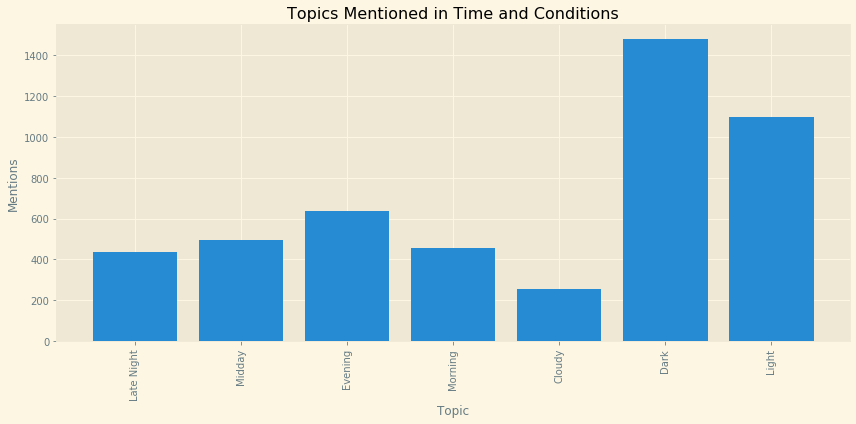

In [539]:
topics = np.array(['test', 'Late Night','Midday','Evening','Morning','Cloudy','Dark','Light'])

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(topic_counts.keys(), topic_counts.values())
ax.set_xlabel('Topic')
ax.set_ylabel('Mentions')
ax.set_xticklabels(topics, rotation= 90)
ax.set_title('Topics Mentioned in Time and Conditions')
fig.tight_layout()

In [540]:
fig.savefig('images/TimeConditions')

In [525]:
[(topic_counts[0], topic_counts[1]) for i, j in topic_counts.items()]

[(437, 496),
 (437, 496),
 (437, 496),
 (437, 496),
 (437, 496),
 (437, 496),
 (437, 496)]

In [541]:
import pandas as pd
import numpy as np
from string import punctuation
import json
from bs4 import BeautifulSoup
import nltk
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from tabulate import tabulate
import matplotlib.pyplot as plt 

def get_stop_words(new_stop_words=None):
    # Retrieve stop words and append any additional stop words
    stop_words = list(ENGLISH_STOP_WORDS)
    if new_stop_words:
        stop_words.extend(new_stop_words)
    return set(stop_words)

def remove_punctuation(string, punc=punctuation):
    # remove given punctuation marks from a string
    for character in punc:
        string = string.replace(character,'')
    return string

def lemmatize_str(string):
    # Lemmatize a string and return it in its original format
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(string)])

def clean_column(df, column, punctuation):
    # Apply data cleaning pipeline to a given pandas DataFrame column
    df[column] = df[column].apply(lambda x: str(x).lower())
    df[column] = df[column].apply(lambda x: remove_punctuation(x, punctuation))
    df[column] = df[column].apply(lambda x: lemmatize_str(x))
    return 

def vectorize(df, column, stop_words):
    # Vectorize a text column of a pandas DataFrame
    text = df[column].values
    vectorizer = TfidfVectorizer(stop_words = stop_words) 
    X = vectorizer.fit_transform(text)
    features = np.array(vectorizer.get_feature_names())
    return X, features 

def get_nmf(X, n_components=7):
    # Create NMF matrixes based on a TF-IDF matrix
    nmf = NMF(n_components=n_components, max_iter=100, random_state=12345, alpha=0.0)
    W = nmf.fit_transform(X)
    H = nmf.components_
    return W, H
    
def get_topic_words(H, features, n_features):
    # Retrieve feature names given H matrix, feature names, and number of features
    top_word_indexes = H.argsort()[:, ::-1][:,:n_features]
    return features[top_word_indexes]

def print_topics(topics):
    # Print topics in markdown format
    n_words = len(topics[0])
    cols = ["Word #"+ str(i) for i in range(n_words)]
    row_idx = [str(i) for i in range(len(topics))]
    df_pretty = pd.DataFrame(columns=cols)
    for topic in topics:
        df_pretty = df_pretty.append([dict(zip(cols, topic))])
    df_pretty['Topic #'] = row_idx
    df_pretty = df_pretty.set_index('Topic #')
    print(tabulate(df_pretty, headers='keys', tablefmt='github'))
    return
    
def document_topics(W):
    return W.argsort()[:,::-1][:,0]
    
def topic_counts(df):
    grouped = df[['topics','observed']].groupby(['topics']).count().sort_values(by = 'observed',ascending = False)
    print(tabulate(grouped.head(), headers='keys', tablefmt='github'))
    
additional_stop_words = [
    "sasquatch",
    "bigfoot",
    "looked",
    "looking",
    "ed",
    "did",
    "nan",
    "big",
    "foot",
    "nan",
    "time",
    "like",
    "wa",
    "the"
]
if __name__ == '__main__':
    np.random.seed(10)
    df_bigfoot = pd.read_pickle("data/bigfoot_pickled_df")
    

    
    stop_words = get_stop_words(additional_stop_words)
    punc = punctuation
    n_topics = 5
    n_top_words = 10
    clean_column(df_bigfoot, "observed", punc)

    X, features = vectorize(df_bigfoot, 'observed', stop_words)
    W, H = get_nmf(X, n_components=n_topics)
    top_words = get_topic_words(H, features, n_features=n_top_words)
    df_bigfoot['topics'] = document_topics(W)
    print_topics(top_words)
    df_bigfoot.to_pickle("data/bigfoot_pickled_df")
    topic_counts(df_bigfoot)



|   Topic # | Word #0   | Word #1   | Word #2   | Word #3   | Word #4   | Word #5   | Word #6   | Word #7   | Word #8   | Word #9   |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
|         0 | tree      | just      | deer      | wood      | trail     | area      | river     | friend    | got       | bear      |
|         1 | heard     | sound     | scream    | loud      | night     | sounded   | tent      | noise     | howl      | animal    |
|         2 | track     | print     | inch      | snow      | footprint | toe       | picture   | trail     | area      | size      |
|         3 | house     | dog       | window    | door      | outside   | said      | night     | went      | ran       | home      |
|         4 | road      | car       | saw       | creature  | driving   | tall      | hair      | arm       | highway   | dark      |
|   topics |   observed |
|----------|------------|
|        0

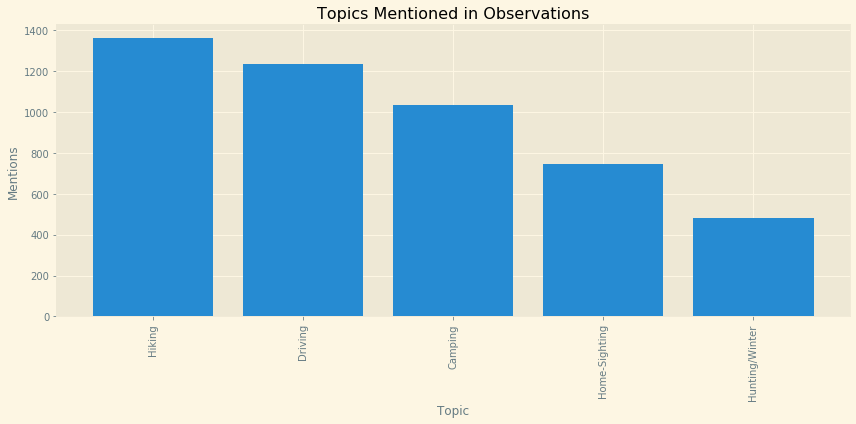

In [550]:
topics = np.array(['test', 'Late Night','Midday','Evening','Morning','Cloudy','Dark','Light'])

time_cond_df = df['time_and_conditions'].reset_index().drop('index', axis = 1)
Counter(document_topics(W))
topic_counts = Counter(document_topics(W))
topics = np.array(['Hiking','Driving','Camping','Home-Sighting','Hunting/Winter'])
counts = np.array([1360,1235,1036,745,481])

fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(topics, counts )
ax.set_xlabel('Topic')
ax.set_ylabel('Mentions')
ax.set_xticklabels(topics, rotation= 90)
ax.set_title('Topics Mentioned in Observations')
fig.tight_layout()

In [551]:
fig.savefig('images/Observations')

In [542]:
top_words

array([['tree', 'just', 'deer', 'wood', 'trail', 'area', 'river',
        'friend', 'got', 'bear'],
       ['heard', 'sound', 'scream', 'loud', 'night', 'sounded', 'tent',
        'noise', 'howl', 'animal'],
       ['track', 'print', 'inch', 'snow', 'footprint', 'toe', 'picture',
        'trail', 'area', 'size'],
       ['house', 'dog', 'window', 'door', 'outside', 'said', 'night',
        'went', 'ran', 'home'],
       ['road', 'car', 'saw', 'creature', 'driving', 'tall', 'hair',
        'arm', 'highway', 'dark']], dtype='<U80')

In [546]:
Counter(document_topics(W))

Counter({2: 481, 0: 1360, 4: 1235, 1: 1036, 3: 745})

In [544]:
df_bigfoot

,a_&_g_references,also_noticed,country,county,date,environment,first_picture_drawn_purely_from_memory.,location_details,month,media_article_#_15,...,observed,other_stories,other_witnesses,province,photo_credit_h._h.,season,state,time_and_conditions,year,topics
0,NaN,"Some tracks in the snow, and a clearing in th...",NaN,Anchorage County,NaN,"In the middle of the woods, in a clearing cov...",NaN,Up near powerline clearings east of Potter Ma...,February,NaN,...,i and two of my friend were bored one night so...,I have not heard of any other incidents in An...,My two friends were snowmachining behind me b...,NaN,NaN,Winter,Alaska,Middle of the night. The only light was the h...,2004,2
0,NaN,"We smelled of colonge and after shave, and on...",NaN,Anchorage County,Friday night,"A pine forest, with a bog or swamp on the rig...",NaN,"Few houses on the way, a power relay station....",December,NaN,...,me and a couple of friend had been bored when ...,no,"4. Me, w-man, warren and sean. We were at my ...",NaN,NaN,Winter,Alaska,"Started at 11, ended at about 3-3:30. Weather...",2003,0
0,NaN,nothing unusual,NaN,Bethel County,3,Call Iliamna Air taxi for lat & Long of Long ...,NaN,"45 miles by air west of Lake Iliamna, Alaska ...",September,NaN,...,my hunting buddy and i were sitting on a ridge...,NaN,Scouting for caribou with high quality binocu...,NaN,NaN,Fall,Alaska,NaN,1998,0
0,NaN,Just these foot prints and how obvious it was...,NaN,Bristol Bay County,20,"Lake front,creek spit, gravel and sand, alder...",NaN,"Approximately 95 miles east of Egegik, Alaska...",July,NaN,...,to whom it may concern i am a commercial fishe...,"I've only heard of one other story, from an o...","One other witness, and he was fishing prior t...",NaN,NaN,Summer,Alaska,"Approximately 12:30 pm, partially coudy/sunny.",2004,2
0,NaN,I did hear what appeared to be grunting in th...,NaN,Cordova-McCarthy County,16,This sighting was located at approximately 1 ...,NaN,"On the main trail toward the glacier, before ...",June,NaN,...,my hiking partner and i arrived late to the ke...,None,"I was the only witness, there was one other i...",NaN,NaN,Summer,Alaska,About 12:00 Midnight / full moon / clear / di...,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,"Just the tree formations in the clearcut, the...",Canada,NaN,14,"Lots of pine and bush mix, maybe some hardwoo...",NaN,Its pretty hard to explain because I dont kno...,July,NaN,...,well i had camped in cypress hill interprovinc...,Haven't heard anything except for what's on y...,"Only my girlfriend and I, we were scanning th...",Saskatchewan,NaN,Summer,NaN,It was about 9:20 p.m. or close to there just...,2001,2
0,NaN,If it was a Bigfoot I am thinking it could ha...,Canada,NaN,NaN,"Graveyard,Pine forest, Fields, Near river and...",NaN,It was near Barrier lake. There is a forested...,July,NaN,...,i came across your website from following a li...,None.,"5 people, two witnesses.",Saskatchewan,NaN,Summer,NaN,"Dark,Night,rain,thunder,lightning.",1995,4
0,NaN,Like I said it was extremely quiet. I don't r...,Canada,NaN,NaN,Pine and Spruce Aspen Willow and swamp.,NaN,AT the end of Thompson Blvd. in a suburban ne...,August,NaN,...,this incident happened in the summer of 1992 i...,Like I said the natives see or hear him in th...,Mother was present but did't see it and I did...,Yukon,NaN,Summer,NaN,"2 P.M. Like I said sunny, 20 degrees.",1992,0
0,NaN,no,Canada,NaN,"June 14, 1995",NaN,NaN,It was in a new part of Carmacks that was bei...,NaN,NaN,...,i wa about 14 year old when me and my friend w...,"yes, there have been many bigfoot sightings i...",Yes my friend Amanda,Yukon,NaN,Summer,NaN,daytime,1995,0
